In [119]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

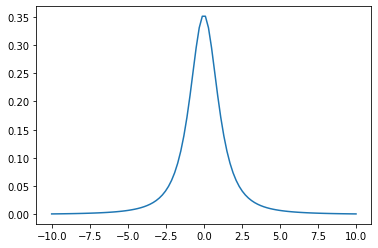

In [120]:
x = np.linspace(-10, 10, 100)
plt.plot(x, t.pdf(x,2)) # 自由度df=2
plt.show()

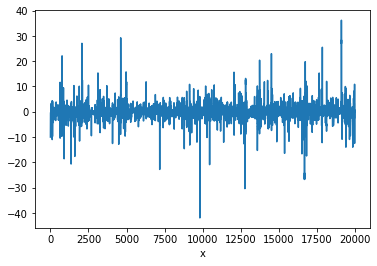

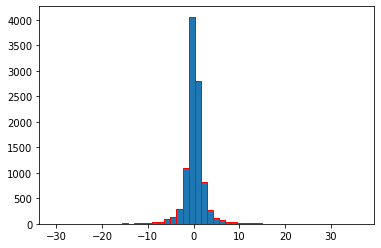

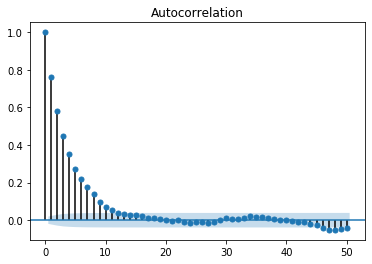

True Mean: 0.000000
Estimated Mean: 0.044464


In [124]:
def sampling(x_old, tune):
    x_cand = np.random.normal(x_old, tune)
    accept_ratio = min(0, t.logpdf(x_cand,2) - t.logpdf(x_old,2))
    u = np.random.rand()
    if u==0 or np.log(u) <= accept_ratio:
        return x_cand
    else:
        return x_old

tune = 10 # 调节参数
n_iter = 20000
x = -10.0
x_draws = []
for i in range(n_iter):
    x = sampling(x, tune)
    x_draws.append(x)
x_draws = np.array(x_draws)

plt.plot(range(n_iter), x_draws)
plt.xlabel('x')
plt.show()

plt.hist(x_draws[int(n_iter/2):], edgecolor = 'r', bins=50)
plt.show()

plot_acf(x_draws[int(n_iter/2):],lags=50)
plt.show()

print("True Mean: %f" % t.mean(2))
print("Estimated Mean: %f" % np.mean(x_draws[int(n_iter/2):]))